### 데이터 다운로드

In [1]:
!ls -al

total 16
drwxr-xr-x 1 root root 4096 Nov 27 22:38 .
drwxr-xr-x 1 root root 4096 Dec  8 10:58 ..
drwxr-xr-x 1 root root 4096 Dec  5 16:38 .config
drwxr-xr-x 1 root root 4096 Nov 27 22:38 sample_data


In [0]:
!rm -rf ./datasets

In [3]:
!ls -al

total 16
drwxr-xr-x 1 root root 4096 Nov 27 22:38 .
drwxr-xr-x 1 root root 4096 Dec  8 10:58 ..
drwxr-xr-x 1 root root 4096 Dec  5 16:38 .config
drwxr-xr-x 1 root root 4096 Nov 27 22:38 sample_data


In [0]:
import os
import tarfile
from six.moves import urllib

DATA_DIR = "./datasets"

# 디렉토리 만들기
if not os.path.isdir(DATA_DIR):
    os.makedirs(DATA_DIR)

In [5]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Dec  8 11:01 .
drwxr-xr-x 1 root root 4096 Dec  8 10:58 ..
drwxr-xr-x 1 root root 4096 Dec  5 16:38 .config
drwxr-xr-x 2 root root 4096 Dec  8 11:01 datasets
drwxr-xr-x 1 root root 4096 Nov 27 22:38 sample_data


In [6]:
!ls -al ./datasets/

total 8
drwxr-xr-x 2 root root 4096 Dec  8 11:01 .
drwxr-xr-x 1 root root 4096 Dec  8 11:01 ..


In [7]:
# housing.tgz 다운로드
DATA_PATH = os.path.join(DATA_DIR, "housing.tgz")
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz", 
    DATA_PATH)

('./datasets/housing.tgz', <http.client.HTTPMessage at 0x7f797a564e80>)

In [8]:
!ls -al ./datasets/

total 408
drwxr-xr-x 2 root root   4096 Dec  8 11:02 .
drwxr-xr-x 1 root root   4096 Dec  8 11:01 ..
-rw-r--r-- 1 root root 409488 Dec  8 11:02 housing.tgz


In [0]:
# 압축 풀기
tgz_file = tarfile.open(DATA_PATH)
tgz_file.extractall(path=DATA_DIR)
tgz_file.close()


In [10]:
!ls -al ./datasets/

total 1800
drwxr-xr-x 2 root root     4096 Dec  8 11:02 .
drwxr-xr-x 1 root root     4096 Dec  8 11:01 ..
-rw-r--r-- 1  501 staff 1423529 May  3  2016 housing.csv
-rw-r--r-- 1 root root   409488 Dec  8 11:02 housing.tgz


#### 데이터 구조 살펴보기

In [0]:
# CSV 파일 읽기
import pandas as pd

def load_data(file_dir=DATA_DIR):
    csv_file = os.path.join(file_dir, "housing.csv")
    return pd.read_csv(csv_file)
    
housing = load_data()


In [12]:
type(housing)

pandas.core.frame.DataFrame

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
!head -5 ./datasets/housing.csv

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [15]:
!tail -5 ./datasets/housing.csv

-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,INLAND
-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


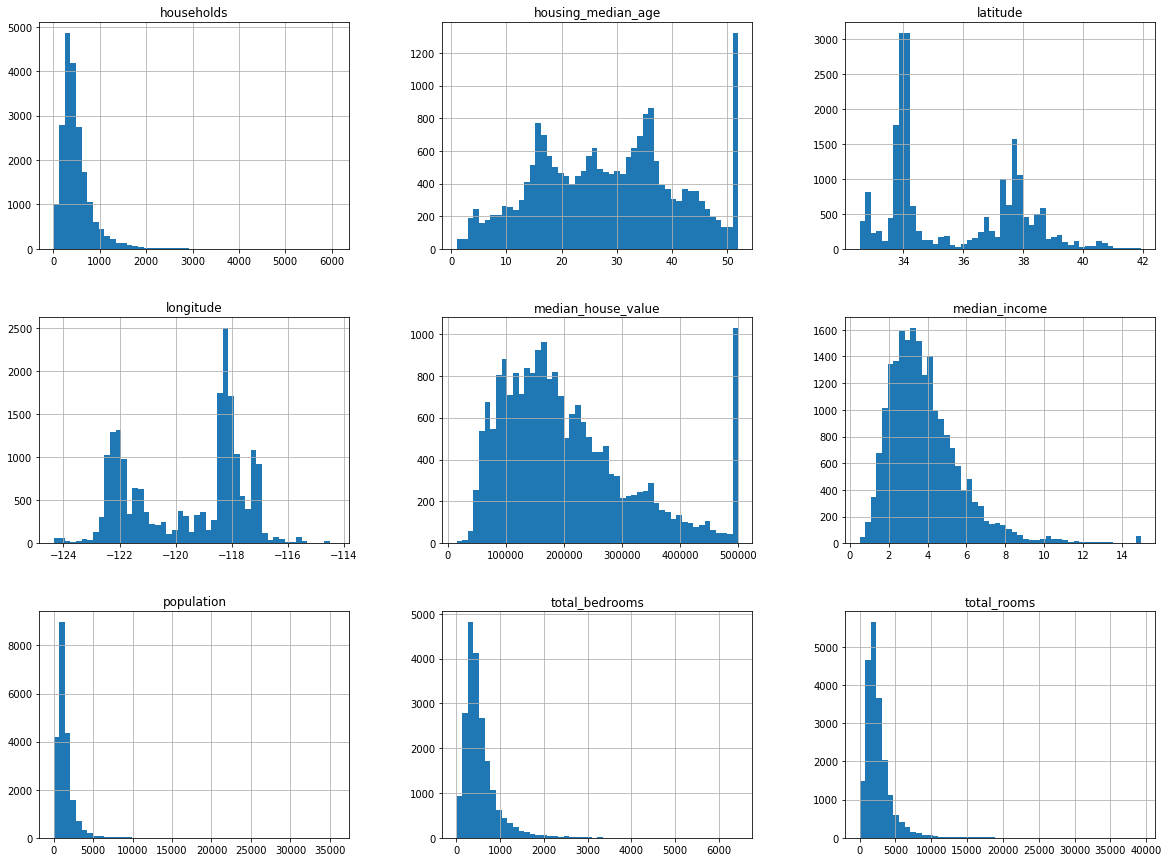

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()


#### 테스트 데이터 셋 만들기

In [20]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# train : test = 80 : 20
train_set, test_set = split_train_test(housing, 0.2)
print("train: {}, test: {}".format(len(train_set), len(test_set)))

train: 16512, test: 4128


In [21]:
from sklearn.model_selection import train_test_split

# train : test = 80 : 20
train_set, test_set = train_test_split(housing, 
                                       test_size=0.2, 
                                       random_state=42)
print("train: {}, test: {}".format(len(train_set), len(test_set)))

train: 16512, test: 4128


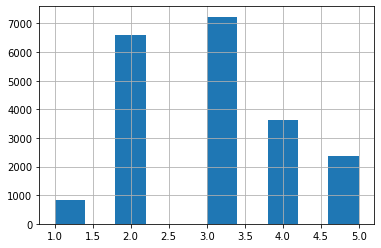

In [22]:
# 소득의 카테고리 만들기
# 1.5 : 소득 카테고리 수를 제한하기 위한 값
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상인 값은 5로 합침
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
# 히스토그램
housing["income_cat"].hist()

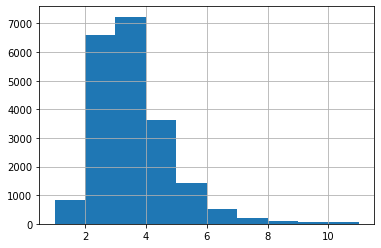

In [23]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].hist()

In [24]:
housing["income_cat"]

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [25]:
housing["income_cat"].describe()

count    20640.000000
mean         3.093362
std          1.303707
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: income_cat, dtype: float64

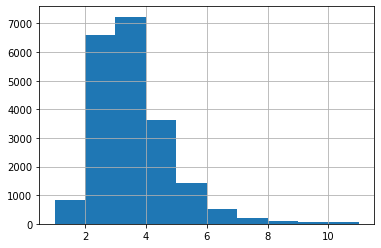

In [26]:
housing["income_cat"].hist()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# 소득 카테고리 비율 살펴보기
housing["income_cat"].value_counts() / len(housing)

3.0     0.350581
2.0     0.318847
4.0     0.176308
5.0     0.068944
1.0     0.039826
6.0     0.025775
7.0     0.009157
8.0     0.005087
9.0     0.002422
11.0    0.002374
10.0    0.000678
Name: income_cat, dtype: float64

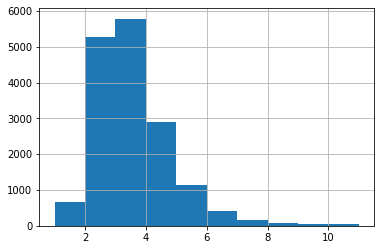

In [28]:
strat_train_set["income_cat"].hist()

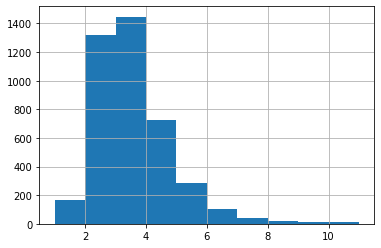

In [29]:
strat_test_set["income_cat"].hist()

In [30]:
housing["income_cat"].value_counts() / len(housing)

3.0     0.350581
2.0     0.318847
4.0     0.176308
5.0     0.068944
1.0     0.039826
6.0     0.025775
7.0     0.009157
8.0     0.005087
9.0     0.002422
11.0    0.002374
10.0    0.000678
Name: income_cat, dtype: float64

In [31]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0     0.350533
2.0     0.318798
4.0     0.176357
5.0     0.069041
1.0     0.039729
6.0     0.025678
7.0     0.009205
8.0     0.005087
9.0     0.002422
11.0    0.002422
10.0    0.000727
Name: income_cat, dtype: float64

In [32]:
type(housing["income_cat"])

pandas.core.series.Series

### 탐색과 시각화

#### 지리적 데이터 시각화

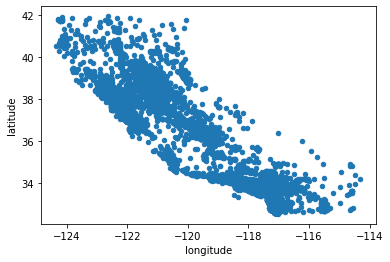

In [33]:
# 훈련 데이터 복사
housing = strat_train_set.copy()

# 위도, 경도에 따른 산점도 그리기
housing.plot(kind="scatter", x="longitude", y="latitude")

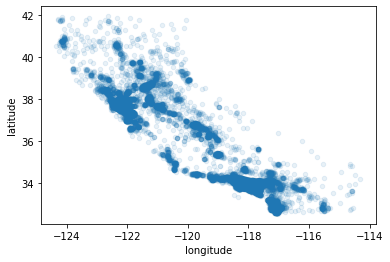

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

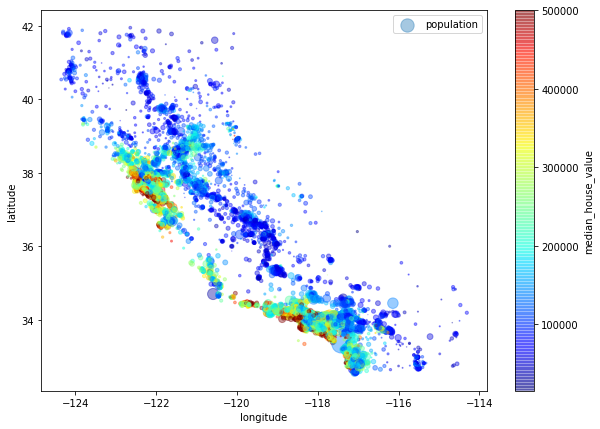

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value",
            cmap=plt.get_cmap("jet"),
            colorbar=True, sharex=False)
plt.legend()

In [36]:
type(housing)

pandas.core.frame.DataFrame

In [37]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924515,-0.109796,0.048963,0.075583,0.107149,0.061549,-0.015589,-0.045056,-0.013558
latitude,-0.924515,1.000000,0.009864,-0.039721,-0.071816,-0.115095,-0.076752,-0.078979,-0.144684,-0.076783
housing_median_age,-0.109796,0.009864,1.000000,-0.363195,-0.324448,-0.297841,-0.305708,-0.116608,0.111770,-0.113993
total_rooms,0.048963,-0.039721,-0.363195,1.000000,0.928874,0.855803,0.917204,0.203718,0.135989,0.198239
total_bedrooms,0.075583,-0.071816,-0.324448,0.928874,1.000000,0.876225,0.979599,-0.005800,0.049177,-0.005357
population,0.107149,-0.115095,-0.297841,0.855803,0.876225,1.000000,0.905172,0.007472,-0.024765,0.007102
households,0.061549,-0.076752,-0.305708,0.917204,0.979599,0.905172,1.000000,0.014929,0.065841,0.014345
median_income,-0.015589,-0.078979,-0.116608,0.203718,-0.005800,0.007472,0.014929,1.000000,0.687474,0.975364
median_house_value,-0.045056,-0.144684,0.111770,0.135989,0.049177,-0.024765,0.065841,0.687474,1.000000,0.667208
income_cat,-0.013558,-0.076783,-0.113993,0.198239,-0.005357,0.007102,0.014345,0.975364,0.667208,1.000000


In [38]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687474
income_cat            0.667208
total_rooms           0.135989
housing_median_age    0.111770
households            0.065841
total_bedrooms        0.049177
population           -0.024765
longitude            -0.045056
latitude             -0.144684
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7965d3f978>,
      dtype=object)

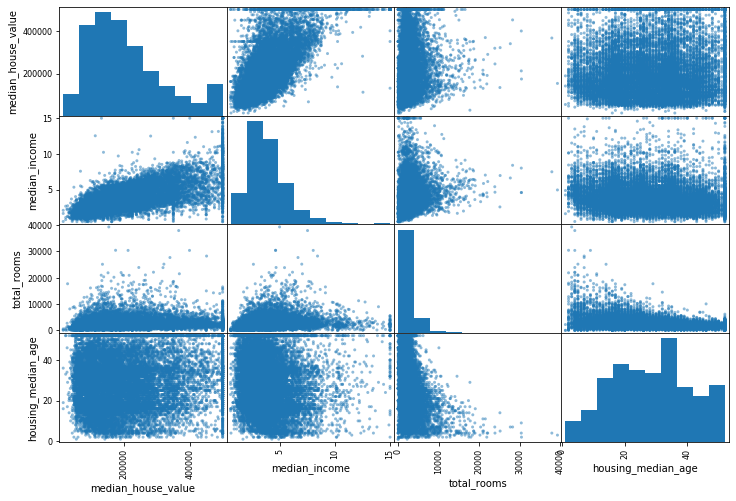

In [39]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income",
              "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

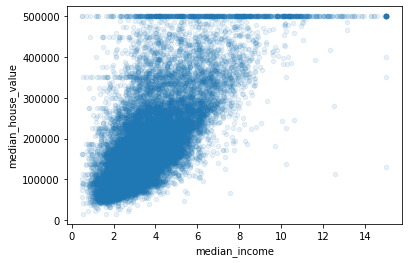

In [40]:
housing.plot(kind="scatter", x="median_income", 
             y="median_house_value", alpha=0.1)

#### 특성들의 조합

In [0]:
housing["rooms_per_household"] = \
    housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = \
    housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = \
    housing["population"]/housing["households"]

In [42]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687474
income_cat                  0.667208
rooms_per_household         0.145750
total_rooms                 0.135989
housing_median_age          0.111770
households                  0.065841
total_bedrooms              0.049177
population_per_household   -0.021844
population                 -0.024765
longitude                  -0.045056
latitude                   -0.144684
bedrooms_per_room          -0.259679
Name: median_house_value, dtype: float64

!pip!!pi!!s!pi!pip show scikit-lear!pip show scikit-lear!pip show scikit-lear!pip show scikit-lear## 알고리즘용 데이터 준비

### 데이터 정제

In [43]:
# 훈련 데이터 복사
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16356
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [44]:
# 해당 구역을 제거
housing2 = housing.dropna(subset=["total_bedrooms"])
housing2.count()

longitude             16356
latitude              16356
housing_median_age    16356
total_rooms           16356
total_bedrooms        16356
population            16356
households            16356
median_income         16356
ocean_proximity       16356
income_cat            16356
dtype: int64

In [45]:
# 특정 값으로 채움
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [46]:
# 전체 특성을 삭제
housing2 = housing.drop("total_bedrooms", axis=1)
housing2.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [47]:
from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer

# 중간값으로 대체하는 객체 생성
# mean, median, most_frequent, constant
imputer = Imputer(strategy="median")
# 수치형 데이터만 선택
housing_num = housing.drop("ocean_proximity", axis=1)
# 학습 및 변환
imputer.fit(housing_num)
X = imputer.transform(housing_num)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [48]:
# pandas DataFrame 으로 변환
housing_df = pd.DataFrame(X, columns=housing_num.columns,
                         index=list(housing.index.values))
housing_df.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
income_cat            16512
dtype: int64

In [49]:
housing.index

Int64Index([17606, 15698, 14650,  3230,  3555, 19480,  9026, 13685,  4937,
             4861,
            ...
            15270,  3754, 12166, 12430,  7364,  6563, 12053, 13908, 11159,
            15775],
           dtype='int64', length=16512)

In [50]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [51]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,NEAR BAY,10.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0


#### 텍스트와 범주형 데이터

In [52]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
15698      NEAR BAY
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
9026     NEAR OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [53]:
housing_cat.factorize()

(array([0, 1, 2, ..., 3, 0, 1]),
 Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object'))

In [54]:
type(housing_cat)

pandas.core.series.Series

In [55]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 2, 3, 0, 3, 2, 3, 0, 0])

In [56]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [57]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# fit_transform()에는 2차원 배열을 넣어야 함
housing_cat_1hot = encoder.fit_transform(
                housing_cat_encoded.reshape(-1,1))
# 출력은 sparse matrix (scipy.sparse.csr.csr_matrix)
housing_cat_1hot

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [58]:
type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

In [59]:
# shape : (16354, 5)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [60]:
housing_cat_1hot.toarray().shape

(16512, 5)

In [61]:
from sklearn.preprocessing import OrdinalEncoder
# 2차원(DataFrame) : reshape(-1,1)과 같은 효과
housing_cat_2d = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = \
            ordinal_encoder.fit_transform(housing_cat_2d)
housing_cat_encoded[:10]

array([[0.],
       [3.],
       [4.],
       [1.],
       [0.],
       [1.],
       [4.],
       [1.],
       [0.],
       [0.]])

In [62]:
type(housing_cat_2d)

pandas.core.frame.DataFrame

In [63]:
housing_cat_2d.shape

(16512, 1)

In [64]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
# 2차원(DataFrame) : reshape(-1,1)과 같은 효과
housing_cat_2d = housing[["ocean_proximity"]]

# default : sparse=True
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_2d)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [66]:
# 2차원(DataFrame) : reshape(-1,1)과 같은 효과
housing_cat_2d = housing_cat.values.reshape(-1,1)

# default : sparse=True
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_2d)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [67]:
housing_cat

17606     <1H OCEAN
15698      NEAR BAY
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: object

In [68]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.571860,35.635516,28.633721,2628.436955,534.731589,1421.965540,497.690286,3.873393,3.093084
std,2.002105,2.137953,12.582583,2155.690963,411.401695,1119.674776,376.108851,1.899090,1.303219
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,1.000000
25%,-121.800000,33.930000,18.000000,1444.000000,296.000000,785.000000,279.000000,2.566775,2.000000
50%,-118.510000,34.260000,29.000000,2122.000000,434.000000,1166.000000,408.000000,3.540900,3.000000
75%,-118.010000,37.720000,37.000000,3146.000000,642.000000,1720.000000,602.000000,4.744475,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,11.000000


In [69]:
housing.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,NEAR BAY,10.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0


In [70]:
housing_labels

17606    286600.0
15698    500001.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [71]:
housing_num=housing.drop("ocean_proximity",axis=1)
imputer = Imputer(strategy="median")
imputer.fit(housing_num)
X1 = imputer.transform(housing_num)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X2 = scaler.transform(X1)

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [74]:
housing_num_tr

array([[-1.15788621,  0.77388697,  0.74440696, ..., -0.42193926,
        -0.61567811, -0.83878249],
       [-1.44259512,  1.0077626 ,  1.85708974, ..., -1.03082399,
         5.48832516,  5.30005131],
       [ 1.18471864, -1.3403487 ,  0.18806557, ..., -0.09489638,
        -0.5325305 , -0.83878249],
       ...,
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.71074586,
        -0.31652576, -0.07142826],
       [ 0.7801323 , -0.84920988,  0.18806557, ..., -0.37673821,
         0.09958088, -0.07142826],
       [-1.43760023,  0.99840757,  1.85708974, ...,  0.37572632,
        -0.1571288 , -0.07142826]])

In [75]:
X2


array([[-1.15788621,  0.77388697,  0.74440696, ..., -0.42193926,
        -0.61567811, -0.83878249],
       [-1.44259512,  1.0077626 ,  1.85708974, ..., -1.03082399,
         5.48832516,  5.30005131],
       [ 1.18471864, -1.3403487 ,  0.18806557, ..., -0.09489638,
        -0.5325305 , -0.83878249],
       ...,
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.71074586,
        -0.31652576, -0.07142826],
       [ 0.7801323 , -0.84920988,  0.18806557, ..., -0.37673821,
         0.09958088, -0.07142826],
       [-1.43760023,  0.99840757,  1.85708974, ...,  0.37572632,
        -0.1571288 , -0.07142826]])

In [76]:
from sklearn.compose import ColumnTransformer

# list 타입
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(16512, 14)

In [77]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [78]:
housing_prepared.shape

(16512, 14)

## 모델 선택과 모델 학습

In [79]:
# 선형 회귀 모델 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# 학습
lin_reg.fit(housing_prepared, housing_labels)
# 예측
sample_data = housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]
sample_data_prepared = full_pipeline.transform(sample_data)
print("predict:\n{}".format(lin_reg.predict(sample_data_prepared)))
print("target:\n{}".format(list(sample_labels)))

predict:
[212181.82938101 659195.64068219 212557.36715275  60844.49648447
 190259.14032616]
target:
[286600.0, 500001.0, 196900.0, 46300.0, 254500.0]


In [80]:
from sklearn.metrics import mean_squared_error
housing_predict = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, 
                             housing_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68941.00570298471

In [81]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 모델 선택
tree_reg = DecisionTreeRegressor()
# 모델 학습
tree_reg.fit(housing_prepared, housing_labels)
# 예측
housing_predict = tree_reg.predict(housing_prepared)
# 평가
tree_mse = mean_squared_error(housing_labels, 
                             housing_predict)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### 교차 검증

In [82]:
from sklearn.model_selection import cross_val_score
# Linear regression
scores = cross_val_score(lin_reg, 
                         housing_prepared,
                         housing_labels, 
                         scoring="neg_mean_squared_error", 
                         cv=10)
scores_rmse = np.sqrt(-scores)
print("LinearRegression score:", scores_rmse.mean())
# Decisoin tree
scores = cross_val_score(tree_reg, 
                         housing_prepared,
                         housing_labels, 
                         scoring="neg_mean_squared_error", 
                         cv=10)
scores_rmse = np.sqrt(-scores)
print("DecisionTree score", scores_rmse.mean())

LinearRegression score: 69135.96637966443
DecisionTree score 69964.28838882958


In [83]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, 
                         housing_prepared,
                         housing_labels, 
                         scoring="neg_mean_squared_error", 
                         cv=10)
scores_rmse = np.sqrt(-scores)
print("RandomForest score", scores_rmse.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest score 52200.822198396825


In [84]:
housing_predict = forest_reg.predict(housing_prepared)
np.sqrt(mean_squared_error(housing_labels, housing_predict))

22032.85640538011

#### Grid Search

In [85]:
from sklearn.model_selection import GridSearchCV
# 파라미터 조합
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10],
                                'max_features': [2,3,4]}
]
forest_reg = RandomForestRegressor()
# grid search
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [86]:
# 최적값 확인
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [87]:
# score 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],
                             cvres["params"]):
    print(np.sqrt(-mean_score), params)

64498.086948723154 {'max_features': 2, 'n_estimators': 3}
56532.68715888906 {'max_features': 2, 'n_estimators': 10}
53768.283655292405 {'max_features': 2, 'n_estimators': 30}
62177.08561345181 {'max_features': 4, 'n_estimators': 3}
54480.609138257154 {'max_features': 4, 'n_estimators': 10}
52348.89931454909 {'max_features': 4, 'n_estimators': 30}
61152.91435201525 {'max_features': 6, 'n_estimators': 3}
53931.545134318054 {'max_features': 6, 'n_estimators': 10}
51832.31860474414 {'max_features': 6, 'n_estimators': 30}
60113.165520974035 {'max_features': 8, 'n_estimators': 3}
53543.19405882382 {'max_features': 8, 'n_estimators': 10}
51102.107209036745 {'max_features': 8, 'n_estimators': 30}
62868.11530370774 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55659.80435636159 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60324.87155770452 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54845.187490600816 {'bootstrap': False, 'max_features': 3, 'n_estimato

#### 최종 모델 평가

In [88]:
# 최종 모델 선택
final_model = grid_search.best_estimator_

# test dataset 으로 평가
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# 전처리
X_test_prepared = full_pipeline.transform(X_test)
# 최종 예측
final_predict = final_model.predict(X_test_prepared)
# 평가
final_mse = mean_squared_error(y_test, final_predict)
final_rmse = np.sqrt(final_mse)
final_rmse

48309.80154255448

In [89]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Dec  8 11:01 .
drwxr-xr-x 1 root root 4096 Dec  8 10:58 ..
drwxr-xr-x 1 root root 4096 Dec  5 16:38 .config
drwxr-xr-x 2 root root 4096 Dec  8 11:02 datasets
drwxr-xr-x 1 root root 4096 Nov 27 22:38 sample_data


## 제출


In [0]:
from google.colab import files
files.upload()

In [0]:
!ls -al

In [0]:
# read test data
df_test = pd.read_csv("test.csv")

# 전처리
df_test = df_test.drop("id", axis=1)
df_test["income_cat"] = np.ceil(housing["median_income"] / 1.5)
X_test = full_pipeline.transform(df_test)
df_test.head()

In [0]:
X_test

In [0]:
# 최종 예측
final_predict = final_model.predict(X_test)


In [0]:
final_predict.shape

In [0]:
submission = pd.read_csv("submitSample.csv")
submission.head()

In [0]:
submission["median_house_value"] = final_predict
submission.head()

In [0]:
submission.to_csv('MySubmission.csv', index=False)

In [0]:
!ls -al

In [0]:
!head -5 MySubmission.csv

In [0]:
!tail -5 MySubmission.csv

In [0]:
from google.colab import files
files.download("MySubmission.csv")

In [0]:
!pip show seaborn
